In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from markowitz.data import ingest, preprocess
from markowitz.simulate import scenarios, efficient_frontier, portfolio_return

### Download the ticker data

In [2]:
exp_ratio = {
    'VDIPX': 0.04,
    'VEMRX': 0.08,
    'VTIFX': 0.07,
    'RGAGX': 0.3,
    'CRISX': 0.93,
    'DODGX': 0.52,
    'MWTSX': 0.38,
    'TISCX': 0.18,
    'VGSNX': 0.1,
    'VWIAX': 0.16
}

In [3]:
sd = "2016-01-01"
ed = pd.to_datetime('now').floor('d').strftime('%Y-%m-%d')
tickers = exp_ratio.keys()

data = ingest(tickers, sd, ed)
df = preprocess(data, tickers)

[*********************100%***********************]  10 of 10 completed


In [4]:
print(df.shape)
display(df.head(3))

(1330, 21)


,Date,VDIPX,VEMRX,VTIFX,RGAGX,CRISX,DODGX,MWTSX,TISCX,VGSNX,...,VDIPX-ret,VEMRX-ret,VTIFX-ret,RGAGX-ret,CRISX-ret,DODGX-ret,MWTSX-ret,TISCX-ret,VGSNX-ret,VWIAX-ret
0,2016-01-04,18.150000,67.080002,31.740000,40.520000,16.639999,160.539993,10.01,15.29,17.260000,...,0.998347,1.000745,1.001260,0.999013,1.001202,0.998131,1.000000,1.002616,1.020278,1.001352
1,2016-01-05,18.120001,67.129997,31.780001,40.480000,16.660000,160.240005,10.01,15.33,17.610001,...,0.985099,0.986593,1.001888,0.987401,0.990396,0.983587,1.002997,0.985649,0.996593,0.997469
2,2016-01-06,17.850000,66.230003,31.840000,39.970001,16.500000,157.610001,10.04,15.11,17.549999,...,0.983193,0.967235,0.999058,0.974231,0.975152,0.974621,1.000000,0.976837,0.980627,0.992725


In [5]:
for c in df.columns:
    if df[c].isnull().sum() == 0:
        print(c, 'all_good')
    else:
        print(c, 'missing_data')

Date all_good
VDIPX all_good
VEMRX all_good
VTIFX all_good
RGAGX all_good
CRISX all_good
DODGX all_good
MWTSX all_good
TISCX all_good
VGSNX all_good
VWIAX all_good
VDIPX-ret all_good
VEMRX-ret all_good
VTIFX-ret all_good
RGAGX-ret all_good
CRISX-ret all_good
DODGX-ret all_good
MWTSX-ret all_good
TISCX-ret all_good
VGSNX-ret all_good
VWIAX-ret all_good


### Simulate and visualize

In [6]:
# 1-year returns for each vehicle across multiple scenarios
# each row is a scenario
rdf = scenarios(df, tickers, exp_ratio, nscenarios=200, ndays=365)
print(rdf.shape)
rdf.head()

(200, 10)


,VDIPX,VEMRX,VTIFX,RGAGX,CRISX,DODGX,MWTSX,TISCX,VGSNX,VWIAX
0,0.390641,0.437611,0.009770,0.492493,0.089620,0.424277,-0.010545,0.312596,0.333725,0.060713
1,0.085255,0.197668,-0.019835,0.416523,-0.118226,0.231375,-0.025201,0.319611,-0.223027,-0.028899
2,0.307527,0.159031,0.039589,0.809679,0.026705,0.287406,-0.001832,0.456920,0.118441,0.048791
3,-0.010524,0.006599,-0.017296,0.270519,-0.307149,0.031100,0.006950,0.080114,-0.069678,-0.094165
4,0.168721,0.181383,0.033797,0.243873,0.214765,0.417232,0.020262,0.516712,0.153324,0.092786


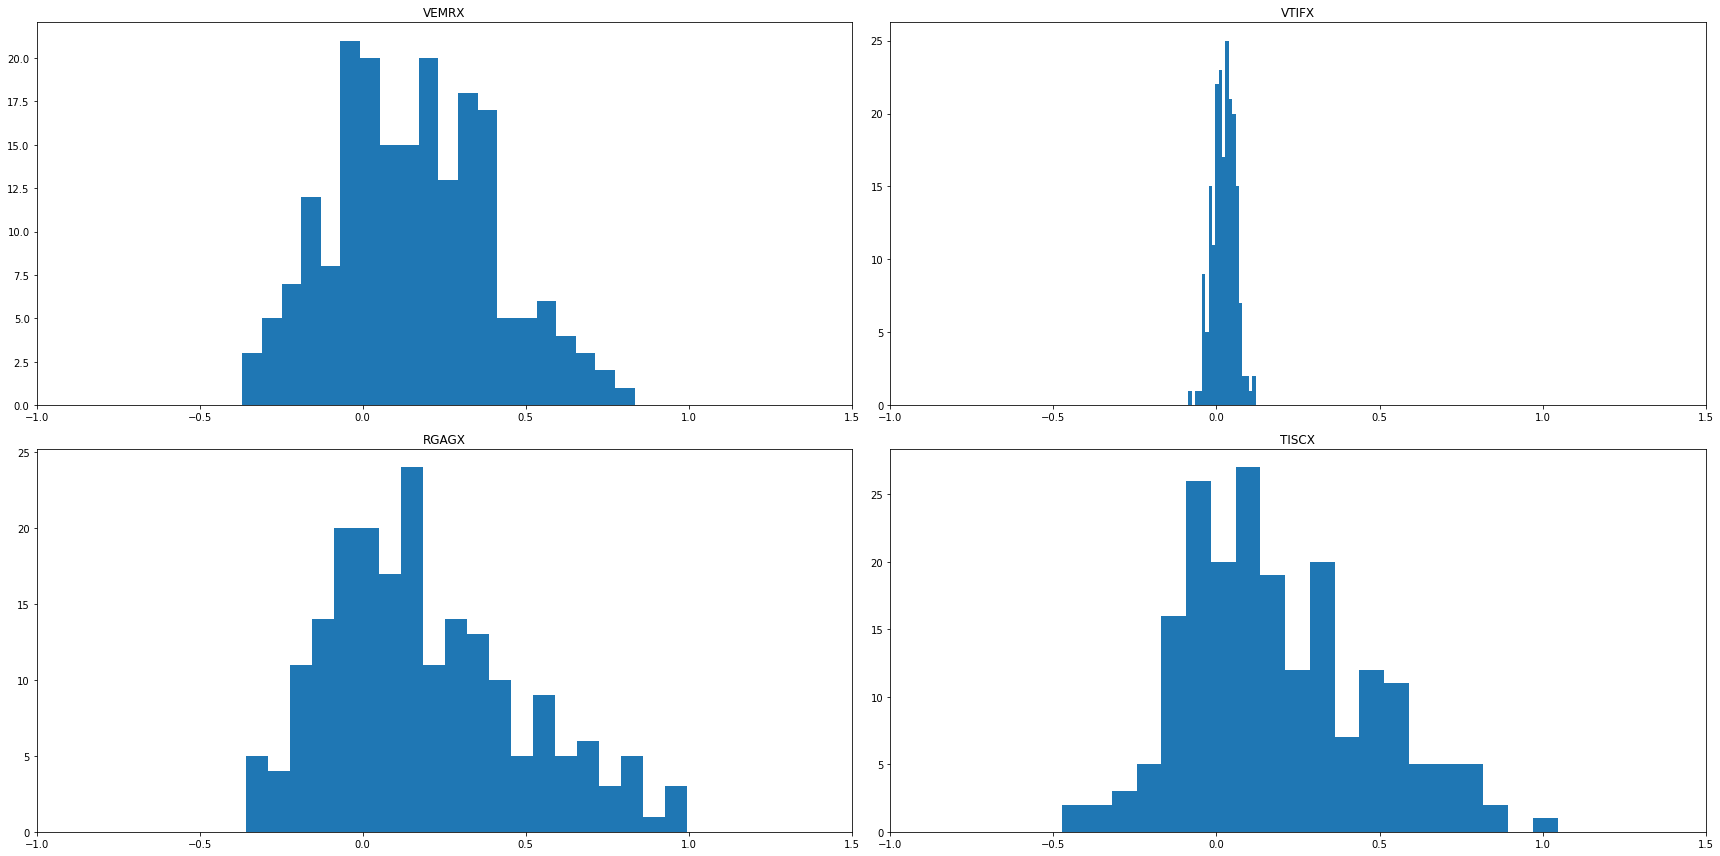

In [7]:
assets = ["VEMRX","VTIFX","RGAGX","TISCX"]

fig = plt.figure(figsize=(24, 12))
ctr = 0
for i in range(len(assets)):
    plt.subplot(2,2,i+1)
    plt.hist(rdf[assets[i]], bins=20)
    plt.xlim([-1,1.5])
    plt.title(assets[i])

plt.tight_layout()
plt.show()

### Optimize

In [8]:
from markowitz.optimize import optimize

In [9]:
min_ratio = 0.3 # minimum expense ratio
min_assets = 1 # minimum assets in the portfolio
max_risk = [0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.01, 0.005] # max risk of negative returns

res_list = []
for m in max_risk:
    obj, wopt, orisk = optimize(rdf, exp_ratio, m, min_ratio, min_assets)
    wopt.update({'return':obj, 'risk': orisk})
    res_list.append(wopt)

resdf = pd.DataFrame(res_list)

col_list = {}
for i, c in enumerate(rdf.columns):
    col_list[i] = c

resdf = resdf.rename(columns=col_list)
resdf

/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


,VDIPX,VEMRX,VTIFX,RGAGX,CRISX,DODGX,MWTSX,TISCX,VGSNX,VWIAX,return,risk
0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,19.004643,0.036998
1,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,19.004643,0.036998
2,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,19.004643,0.036998
3,0.0,0.000000,0.000000,0.857756,0.0,0.0,0.0,0.142244,0.0,0.0,18.901095,0.035000
4,0.0,0.136862,0.000000,0.355324,0.0,0.0,0.0,0.507813,0.0,0.0,18.183068,0.030000
5,0.0,0.168207,0.125382,0.276425,0.0,0.0,0.0,0.429986,0.0,0.0,16.041081,0.025000
6,0.0,0.181030,0.258403,0.189538,0.0,0.0,0.0,0.371028,0.0,0.0,13.818865,0.020000
7,0.0,0.116127,0.411256,0.156156,0.0,0.0,0.0,0.316461,0.0,0.0,11.518699,0.015000
8,0.0,0.105639,0.561924,0.043548,0.0,0.0,0.0,0.288888,0.0,0.0,9.055719,0.010000
9,0.0,0.062715,0.758780,0.000000,0.0,0.0,0.0,0.178506,0.0,0.0,5.988333,0.005000


In [10]:
w = {
    'VDIPX': 0.0,
    'VEMRX': 0.2,
    'VTIFX': 0.25,
    'RGAGX': 0.35,
    'CRISX': 0.0,
    'DODGX': 0.0,
    'MWTSX': 0.0,
    'TISCX': 0.2,
    'VGSNX': 0.0,
    'VWIAX': 0.0
}

pdf, perc_neg_scenarios, avg_neg_return, avg_return = portfolio_return(rdf, w)
print(perc_neg_scenarios, avg_neg_return, avg_return)

0.26 -0.021153902505978595 0.1402114646652518


In [11]:
# Final chosen
res = {
    'VEMRX': 0.2,
    'VTIFX': 0.25,
    'RGAGX': 0.35,
    'TISCX': 0.2
}